In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [4]:
X_train = np.linspace(-1,1,20)

In [5]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
X_test = np.linspace(-1,1,20)

In [7]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

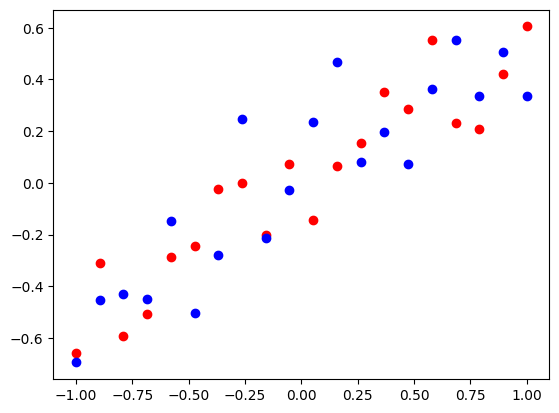

In [8]:
plt.scatter(X_train,y_train,c='red',label='train')
plt.scatter(X_test,y_test,c='blue',label='test')
plt.show()

In [9]:
# Regression Model
model1 = Sequential()
model1.add(Dense(128,activation='relu',input_dim=1))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model1.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mse'])

In [15]:
history = model1.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0103 - mse: 

In [16]:
# Evakuate the Model
_, train_mse = model1.evaluate(X_train,y_train,verbose=0)
_, test_mse = model1.evaluate(X_test,y_test,verbose=0)
print("Train {} Test{}".format(train_mse,test_mse))

Train 0.006087397690862417 Test0.042422398924827576


In [21]:
y_pred_1 = model1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


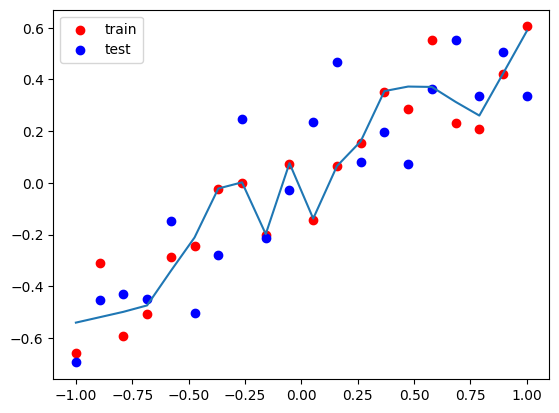

In [22]:
plt.figure()
plt.scatter(X_train,y_train,c='red',label='train')
plt.scatter(X_test,y_test,c='blue',label='test')
plt.plot(X_test,y_pred_1)
plt.legend()
plt.show()

In [17]:
# Dropout Model

In [31]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim=1))
model2.add(Dropout(0.5))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model2.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mse'])

In [33]:
history1 = model2.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1245 - mse: 0.1245 - val_loss: 0.1218 - val_mse: 0.1218
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.1374 - mse: 0.1374 - val_loss: 0.1062 - val_mse: 0.1062
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1104 - mse: 0.1104 - val_loss: 0.0920 - val_mse: 0.0920
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0952 - mse: 0.0952 - val_loss: 0.0796 - val_mse: 0.0796
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0831 - mse: 0.0831 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0758 - mse: 0.0758 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0673 - mse: 0.0673 - val_loss: 0.0521 - val_mse: 0.0521
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0492 - mse: 0

In [34]:
# Evaluate the model
_, train_mse1 = model2.evaluate(X_train,y_train)
_, test_mse1 = model2.evaluate(X_test,y_test)
print("Train: {}  Test: {}".format(train_mse1,test_mse1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0159 - mse: 0.0159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0332 - mse: 0.0332
Train: 0.015907730907201767  Test: 0.03316493704915047


In [35]:
y_pred_2 = model2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


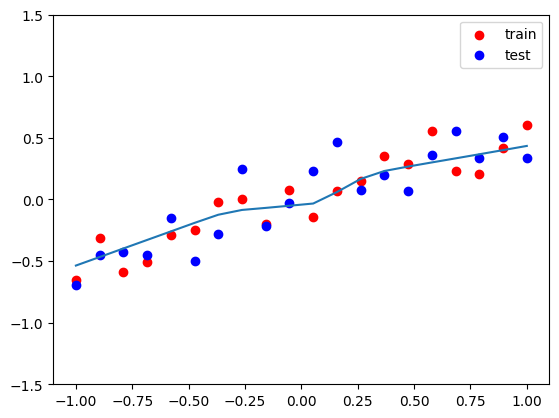

In [36]:
plt.figure()
plt.scatter(X_train,y_train,c='red',label='train')
plt.scatter(X_test,y_test,c='blue',label='test')
plt.plot(X_test,y_pred_2)
plt.legend()
plt.ylim(-1.5,1.5)
plt.show()